<a href="https://colab.research.google.com/github/eBetcel/analise-ITP/blob/main/analise_itp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para a preparação vamos primeiro importar as bibliotecas necessárias para a nossa análise exploratória

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set()
from math import isnan


In [ ]:
url = 'https://raw.githubusercontent.com/eBetcel/analise-ITP/main/dados_itp.csv'
dados_itp = pd.read_csv(url, decimal=',')

In [ ]:
dados_itp.head()

,id,unidade_1,unidade_2,unidade_3,faltas,situacao,tipo_de_ensino,semestre,p4
0,8gD86mMQp7J2wFahWQBbQA==,9.3,9.2,9.3,16,APR,PRESENCIAL,2019_1,NaN
1,skhYzylUGrREZ/GAcyQ4vQ==,7.6,5.3,7.5,14,APRN,PRESENCIAL,2019_1,NaN
2,1Y2tYV1PJYRRD/b/c8evqA==,4.1,1.0,6.5,12,APR,PRESENCIAL,2019_1,4.5
3,KRj6MTZYhyqXVn09x8Ap+g==,3.0,6.3,6.0,18,APRN,PRESENCIAL,2019_1,NaN
4,Nc5xTLwfZcUtxyiEhTOkOg==,5.0,3.5,5.5,21,APR,PRESENCIAL,2019_1,4.5


In [ ]:

# dados_itp.describe()
# dados_itp.query("situacao == 'REPF' & nota_final == 10" )

od.

SyntaxError: ignored

In [ ]:
def desistente(row):
  if (row['faltas']>30 and row['unidade_2'] == 0 and row['unidade_3'] == 0):
    return 1
  else:
    return 0

In [ ]:
def foi_pra_p4(row):
  if not isnan(row['p4']):
    return 1
  else:
    return 0

In [ ]:
dados_itp['desistente'] = dados_itp.apply(lambda row: desistente(row), axis=1)

In [ ]:
dados_itp.head()

,id,unidade_1,unidade_2,unidade_3,faltas,situacao,tipo_de_ensino,semestre,p4,foi_pra_p4,nota_final,situacao_final,desistente
0,8gD86mMQp7J2wFahWQBbQA==,9.3,9.2,9.3,16,APR,PRESENCIAL,2019_1,NaN,0,9.3,1,0
1,skhYzylUGrREZ/GAcyQ4vQ==,7.6,5.3,7.5,14,APRN,PRESENCIAL,2019_1,NaN,0,6.8,1,0
2,1Y2tYV1PJYRRD/b/c8evqA==,4.1,1.0,6.5,12,APR,PRESENCIAL,2019_1,4.5,1,5.0,1,0
3,KRj6MTZYhyqXVn09x8Ap+g==,3.0,6.3,6.0,18,APRN,PRESENCIAL,2019_1,NaN,0,5.1,1,0
4,Nc5xTLwfZcUtxyiEhTOkOg==,5.0,3.5,5.5,21,APR,PRESENCIAL,2019_1,4.5,1,5.0,1,0


In [ ]:
def nota_final(row):
  if not isnan(row['p4']):
    notas = [row['unidade_1'], row['unidade_2'], row['unidade_3']]
    notas.remove(min(notas))
    notas.append(row['p4'])
    resultado = sum(notas) / len(notas)
    return round(resultado,1)
  else:
    resultado = (row['unidade_1'] + row['unidade_2'] + row['unidade_3']) / 3
    return round(resultado,1)

In [ ]:
dados_itp['nota_final'] = dados_itp.apply(lambda row: nota_final(row), axis=1)

In [ ]:
def situacao_final(row):
  aprovados = ['APR', 'APRN']
  reprovados = ['REMF', 'REP', 'REPF', 'RENF', 'REC', 'REPN']
  if(row['situacao'] in aprovados):
    return 1
  if(row['situacao'] in reprovados):
    return 0

In [ ]:
dados_itp['situacao_final'] = dados_itp.apply(lambda row: situacao_final(row), axis=1)

In [ ]:
dados_pre_pandemia = dados_itp[dados_itp['tipo_de_ensino'] == 'PRESENCIAL']
dados_pandemia = dados_itp[dados_itp['tipo_de_ensino'] == 'REMOTO']

In [ ]:
dados_itp.head()

,id,unidade_1,unidade_2,unidade_3,faltas,situacao,tipo_de_ensino,semestre,p4,foi_pra_p4,nota_final,situacao_final
0,8gD86mMQp7J2wFahWQBbQA==,9.3,9.2,9.3,16,APR,PRESENCIAL,2019_1,NaN,0,9.3,1
1,skhYzylUGrREZ/GAcyQ4vQ==,7.6,5.3,7.5,14,APRN,PRESENCIAL,2019_1,NaN,0,6.8,1
2,1Y2tYV1PJYRRD/b/c8evqA==,4.1,1.0,6.5,12,APR,PRESENCIAL,2019_1,4.5,1,5.0,1
3,KRj6MTZYhyqXVn09x8Ap+g==,3.0,6.3,6.0,18,APRN,PRESENCIAL,2019_1,NaN,0,5.1,1
4,Nc5xTLwfZcUtxyiEhTOkOg==,5.0,3.5,5.5,21,APR,PRESENCIAL,2019_1,4.5,1,5.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


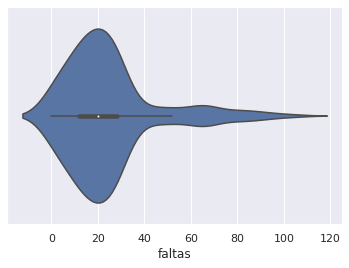

In [ ]:
sns.violinplot(dados_pre_pandemia['faltas'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


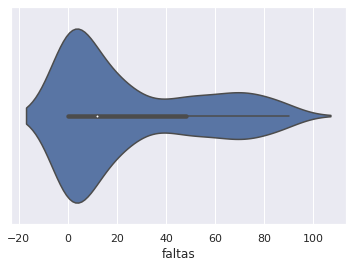

In [ ]:
sns.violinplot(dados_pandemia['faltas'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


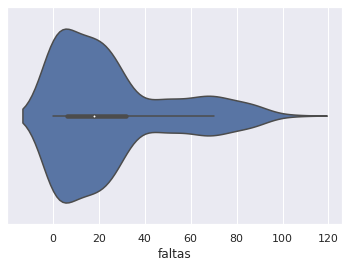

In [ ]:
sns.violinplot(dados_itp['faltas'])

In [ ]:
dados_itp[dados_itp['semestre'] == '2021_1'].describe()



,unidade_1,unidade_2,unidade_3,faltas,p4,foi_pra_p4,nota_final,situacao_final
count,117.000000,117.000000,117.000000,117.000000,9.000000,117.000000,117.000000,117.000000
mean,5.379487,2.781197,3.362393,24.495726,4.555556,0.076923,3.934188,0.418803
std,3.934015,3.262824,4.231669,32.670672,3.244654,0.267615,3.583804,0.495485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.300000,0.000000
50%,6.400000,0.600000,0.000000,6.000000,5.000000,0.000000,2.600000,0.000000
75%,9.400000,5.300000,8.000000,54.000000,7.000000,0.000000,7.600000,1.000000
max,10.000000,10.000000,10.000000,90.000000,9.000000,1.000000,10.000000,1.000000


In [ ]:
# len(dados_itp.index)
dados_agrupados = dados_itp.groupby(['semestre','desistente']).count()
dados_agrupados.head(20)

id  unidade_1  ...  nota_final  situacao_final
semestre desistente                  ...                            
2019_1   0            84         84  ...          84              84
         1            14         14  ...          14              14
2019_2   0           243        243  ...         243             243
         1            17         17  ...          17              17
2020_1   0           118        118  ...         118             118
         1            17         17  ...          17              17
2020_2   0           142        142  ...         142             142
         1            38         38  ...          38              38
2021_1   0            90         90  ...          90              90
         1            27         27  ...          27              27

[10 rows x 11 columns]

In [ ]:
dados_pre_pandemia

,id,unidade_1,unidade_2,unidade_3,faltas,situacao,tipo_de_ensino,semestre,p4,foi_pra_p4,nota_final,situacao_final
0,8gD86mMQp7J2wFahWQBbQA==,9.3,9.2,9.3,16,APR,PRESENCIAL,2019_1,NaN,0,9.3,1
1,skhYzylUGrREZ/GAcyQ4vQ==,7.6,5.3,7.5,14,APRN,PRESENCIAL,2019_1,NaN,0,6.8,1
2,1Y2tYV1PJYRRD/b/c8evqA==,4.1,1.0,6.5,12,APR,PRESENCIAL,2019_1,4.5,1,5.0,1
3,KRj6MTZYhyqXVn09x8Ap+g==,3.0,6.3,6.0,18,APRN,PRESENCIAL,2019_1,NaN,0,5.1,1
4,Nc5xTLwfZcUtxyiEhTOkOg==,5.0,3.5,5.5,21,APR,PRESENCIAL,2019_1,4.5,1,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
353,NIUuKzySuQAtP6mi3w4K8g==,10.0,10.0,10.0,4,APR,PRESENCIAL,2019_2,NaN,0,10.0,1
354,SEP05wY6Dh0vd8sWD/MyQg==,1.6,2.6,1.3,16,REP,PRESENCIAL,2019_2,NaN,0,1.8,0
355,9zIykKXiz69Gh92znqb8XQ==,3.6,1.0,0.0,85,REMF,PRESENCIAL,2019_2,NaN,0,1.5,0
356,7QZCP2yqzCJ0X8r3LJ2tsg==,0.9,5.3,5.9,0,APR,PRESENCIAL,2019_2,8.0,1,6.4,1


In [ ]:
dados_pre_pandemia = dados_itp.query("tipo_de_ensino == 'PRESENCIAL'")
dados_pre_pandemia.situacao.value_counts()
# testandoo = dados_pandemia.query("situacao == 'REC'")
# testandoo.head(30)

# testandoo = dados_pre_pandemia.query("situacao == 'REC'")
# testandoo.head(30)

APR     128
REMF     86
APRN     63
REP      51
REPF     20
RENF      8
REPN      2
Name: situacao, dtype: int64

In [ ]:
dados_pandemia = dadositp.query("tipo_de_ensino == 'REMOTO'")
dados_pre_pandemia = dadositp.query("tipo_de_ensino == 'PRESENCIAL'")

,id,unidade_1,unidade_2,unidade_3,faltas,situacao,tipo_de_ensino,semestre,p4,foi_pra_p4,nota_final,situacao_final
0,8gD86mMQp7J2wFahWQBbQA==,9.3,9.2,9.3,16,APR,PRESENCIAL,2019_1,NaN,0,9.3,1
1,skhYzylUGrREZ/GAcyQ4vQ==,7.6,5.3,7.5,14,APRN,PRESENCIAL,2019_1,NaN,0,6.8,1
2,1Y2tYV1PJYRRD/b/c8evqA==,4.1,1.0,6.5,12,APR,PRESENCIAL,2019_1,4.5,1,5.0,1
3,KRj6MTZYhyqXVn09x8Ap+g==,3.0,6.3,6.0,18,APRN,PRESENCIAL,2019_1,NaN,0,5.1,1
4,Nc5xTLwfZcUtxyiEhTOkOg==,5.0,3.5,5.5,21,APR,PRESENCIAL,2019_1,4.5,1,5.0,1


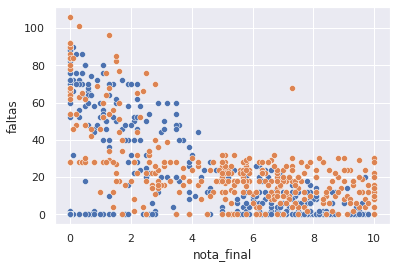

In [ ]:
# # import necessary libraries
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
  
sns.scatterplot(data=dados_pandemia, x='nota_final', y='faltas')
sns.scatterplot(data=dados_pre_pandemia, x='nota_final', y='faltas')


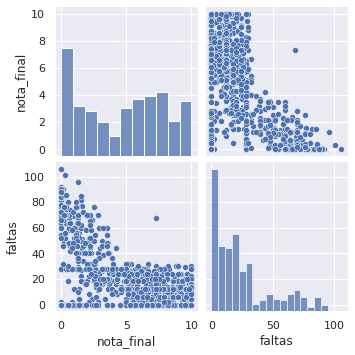

In [ ]:
sns.pairplot(dados_itp[['nota_final', 'faltas']])

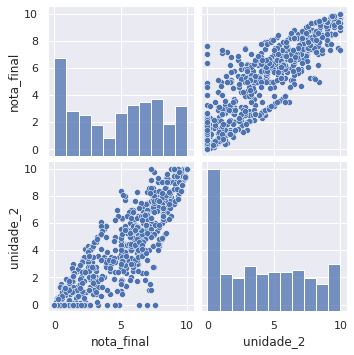

In [ ]:
sns.pairplot(dadositp[['nota_final', 'unidade_2']])

In [ ]:
import sklearn.cluster as cluster

In [ ]:
kmeans = cluster.KMeans(n_clusters=3, init='k-means++')
kmeans = kmeans.fit(dadositp[['unidade_2','nota_final']])

In [ ]:
kmeans.cluster_centers_

array([[4.35620438, 5.6379562 ],
       [8.34976526, 8.43615023],
       [0.66930693, 1.18943894]])

In [ ]:
dadositp['Clusters'] = kmeans.labels_

In [ ]:
dadositp.head()

,id,unidade_1,unidade_2,unidade_3,faltas,situacao,tipo_de_ensino,semestre,p4,nota_final,situacao_final,Clusters
0,8gD86mMQp7J2wFahWQBbQA==,9.3,9.2,9.3,16,APR,PRESENCIAL,2019_1,NaN,9.3,1,1
1,skhYzylUGrREZ/GAcyQ4vQ==,7.6,5.3,7.5,14,APRN,PRESENCIAL,2019_1,NaN,6.8,1,2
2,1Y2tYV1PJYRRD/b/c8evqA==,4.1,1.0,6.5,12,APR,PRESENCIAL,2019_1,4.5,5.0,1,2
3,KRj6MTZYhyqXVn09x8Ap+g==,3.0,6.3,6.0,18,APRN,PRESENCIAL,2019_1,NaN,5.1,1,2
4,Nc5xTLwfZcUtxyiEhTOkOg==,5.0,3.5,5.5,21,APR,PRESENCIAL,2019_1,4.5,5.0,1,2


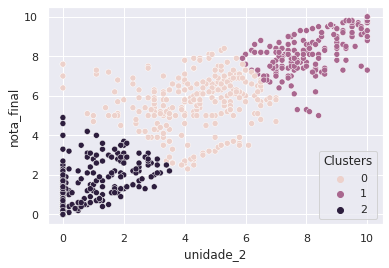

In [ ]:
sns.scatterplot(x='unidade_2', y='nota_final', hue = 'Clusters', data=dadositp)

dadositp.head()

In [ ]:
dadositp['situacao'].value_counts(normalize=True)

APR     0.329114
REMF    0.292405
REP     0.168354
APRN    0.168354
REPF    0.025316
RENF    0.010127
REPN    0.003797
REC     0.002532
Name: situacao, dtype: float64

In [ ]:
dados_pandemia = dadositp.query("tipo_de_ensino == 'REMOTO'")
dados_pre_pandemia = dadositp.query("tipo_de_ensino == 'PRESENCIAL'")

In [ ]:
dados_pandemia['situacao'].value_counts(normalize=True)

REMF    0.335648
APR     0.305556
REP     0.189815
APRN    0.162037
REC     0.004630
REPN    0.002315
Name: situacao, dtype: float64

In [ ]:
dados_pre_pandemia['situacao'].value_counts(normalize=True)

APR     0.357542
REMF    0.240223
APRN    0.175978
REP     0.142458
REPF    0.055866
RENF    0.022346
REPN    0.005587
Name: situacao, dtype: float64